# Case Study 1

#### Model selection for Clustering

Clustering is unsupervised learning: the resulting clusters are completely derived from data distributed in given a feature set with no class available

Compared to supervised learning counterparts, it is …
* hard to define model performance (cluster quality)
* sensitive to different clustering algorithms and different feature spaces.



#### Task
Your task is to try different clustering algorithms and also a range of the potential parameter(s) which affect the number of clusters including ..

* K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Gaussian Mixture Model, 
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* Hierarchical Clustering, 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
* Louvain Clustering, 
https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering

on 5K colorectal patches represented by 4 different representation PathologyGAN, ResNet50, InceptionV3 and VGG16


#### Data and its preprocessing 
5,000 non-overlapping image patches from hematoxylin & eosin (H&E) stained histological images of human colorectal cancer (CRC) and normal tissue.
* 4 feature sets, PathologyGAN, ResNet50, InceptionV3 and VGG16, are extracted to represent those 5,000 images different dimensional feature spaces.
* PCA and UMAP were employed to reduce each feature sapce into 100-dimensional vectors

* 9 tissue types are also available which include Adipose (ADI), background (BACK), debris (DEB), lymphocytes (LYM), mucus (MUC), smooth muscle (MUS), normal colon mucosa (NORM), cancer-associated stroma (STR), colorectal adenocarcinoma epithelium (TUM)


#### Performance Measurement
To assess quality of clustering solutions, several approaches are expected to be done and interpreted which include...
* Silhouette Score for goodness of fit test
* Vmeasure Score for homogeneity and completeness test (tissue type available as ground truth)
* Clusters visualisations

For more information, please have a check...
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


#### Report
Report on your preprocessing pipeline, theory and intuition behinds each algorithm and representation, parameter searching and performance evaluation frameworks. If there is any addiotional process, give evidences/justifications on how it helps.

#### Required Packages

In [397]:
# !pip install h5py==2.10.0
# !pip install numpy
# !pip install pandas
# !pip install sklearn
# !pip install scikit-network
# !pip install pickle-mixin==1.0.2
# !pip install matplotlib
# !pip install plotly

### Prepare Tissue Representations

In [398]:
import h5py
import numpy as np
import pickle

In [399]:
pge_path = 'colon_nct_feature/pge_dim_reduced_feature.h5'
resnet50_path = 'colon_nct_feature/resnet50_dim_reduced_feature.h5'
inceptionv3_path = 'colon_nct_feature/inceptionv3_dim_reduced_feature.h5'
vgg16_path = 'colon_nct_feature/vgg16_dim_reduced_feature.h5'

pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')
inceptionv3_content = h5py.File(inceptionv3_path, mode='r')
vgg16_content = h5py.File(vgg16_path, mode='r')


In [400]:
vgg16_content

<HDF5 file "vgg16_dim_reduced_feature.h5" (mode r)>

In [401]:
#PCA feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_pca_feature  = pge_content['pca_feature'][...]
resnet50_pca_feature  = resnet50_content['pca_feature'][...]
inceptionv3_pca_feature = inceptionv3_content['pca_feature'][...]
vgg16_pca_feature  = vgg16_content['pca_feature'][...]

In [402]:
vgg16_pca_feature

array([[ -90.864815 ,  107.03243  ,  116.16385  , ...,    8.259951 ,
          -1.1383446,   -9.175951 ],
       [ -74.06226  ,  117.31615  ,   95.24547  , ...,   -1.9739974,
           6.8172655,    4.2547903],
       [ -81.875336 ,  122.84872  ,   83.767784 , ...,   -1.3287221,
          13.65623  ,  -11.109545 ],
       ...,
       [  32.70835  ,   31.183935 ,  -47.30978  , ...,    4.2004256,
           3.599823 ,    6.0058775],
       [ -39.911785 , -105.81029  ,  122.37118  , ...,  -14.908715 ,
          -1.1814455,  -10.837135 ],
       [  32.35425  ,  -50.3373   ,   66.50197  , ...,   -3.859397 ,
          -1.047523 ,    2.3827858]], dtype=float32)

In [403]:
#UMAP feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]
inceptionv3_umap_feature  = inceptionv3_content['umap_feature'][...]
vgg16_umap_feature  = vgg16_content['umap_feature'][...]

In [404]:
#tissue type as available ground-truth: labels
filename  = np.squeeze(pge_content['file_name'])
filename = np.array([str(x) for x in filename])
labels = np.array([x.split('/')[2] for x in filename])

labels_counts = np.unique(labels, return_counts = True)
print(labels_counts)


(array(['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'],
      dtype='<U4'), array([532, 552, 547, 562, 460, 687, 422, 498, 740], dtype=int64))


# Example

In [405]:
import random

In [406]:
random.seed(0)
selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 200)

In [407]:
test_data = pge_pca_feature[selected_index]
test_label = labels[selected_index]

### Exploratory Analysis

In [408]:
import plotly.graph_objects as go
import pandas as pd

In [409]:
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=test_data[test_label==name,0],
        y=test_data[test_label==name,1],
        z=test_data[test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="First 3 pricipal components of PathologyGAN's PCA feature",
    legend_title="Legend Title",
)

fig.show()


C:\Users\admin\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\admin\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




### Model training

Text(0.5, 1.0, 'WCSS Elbow Curve - PGE PCA FEATURE')

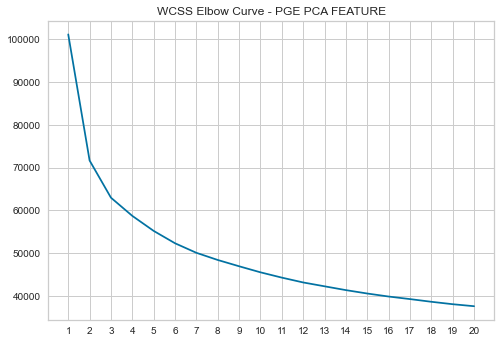

In [410]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sknetwork.clustering import Louvain

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

wcss_pgepca=[]
#using elbow for PGE PCA FEATURE dataset to find n_clusters

for i in range(1,21):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1234)
    kmeans.fit(pge_pca_feature)
    wcss_pgepca.append(kmeans.inertia_)

plt.plot(np.arange(1,21),wcss_pgepca,'bx-')
wcss_n=np.array(wcss_pgepca)
plt.xticks(np.arange(1, 21, 1))
plt.title("WCSS Elbow Curve - PGE PCA FEATURE")
#plt.axvline(x=2, color='r', linestyle='--')
#plt.axvline(x=3, color='g', linestyle='--')

#abrupt change can be seen at n=2 and n=3

In [411]:
#PGE PCA K-Means Hyperparameter tuning for alg=lloyd (uncomment to run it)
'''pd.set_option('display.max_rows',500)
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
df=pd.DataFrame()
num1=[]

for i in clusters:
    for j in methodxx:
        #for l in algorithm:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)
            kmeans_2.fit(pge_pca_feature)
            predic_2=kmeans_2.predict(pge_pca_feature)
            kmeans_silhouette = silhouette_score(pge_pca_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(pge_pca_feature, predic_2)
            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df
'''           
            

"pd.set_option('display.max_rows',500)\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\ndf=pd.DataFrame()\nnum1=[]\n\nfor i in clusters:\n    for j in methodxx:\n        #for l in algorithm:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)\n            kmeans_2.fit(pge_pca_feature)\n            predic_2=kmeans_2.predict(pge_pca_feature)\n            kmeans_silhouette = silhouette_score(pge_pca_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(pge_pca_feature, predic_2)\n            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf\n"

In [412]:
'''#PGE PCA K-Means Hyperparameter tuning for alg=elkan/auto/full (uncomment to run it)
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
num1=[]
for i in clusters:
    for j in methodxx:
        for k in algorithm:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)
            kmeans_2.fit(pge_pca_feature)
            predic_2=kmeans_2.predict(pge_pca_feature)
            kmeans_silhouette = silhouette_score(pge_pca_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(pge_pca_feature, predic_2)
            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)
            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df
            '''

"#PGE PCA K-Means Hyperparameter tuning for alg=elkan/auto/full (uncomment to run it)\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\nnum1=[]\nfor i in clusters:\n    for j in methodxx:\n        for k in algorithm:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)\n            kmeans_2.fit(pge_pca_feature)\n            predic_2=kmeans_2.predict(pge_pca_feature)\n            kmeans_silhouette = silhouette_score(pge_pca_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(pge_pca_feature, predic_2)\n            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)\n            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf\n            "

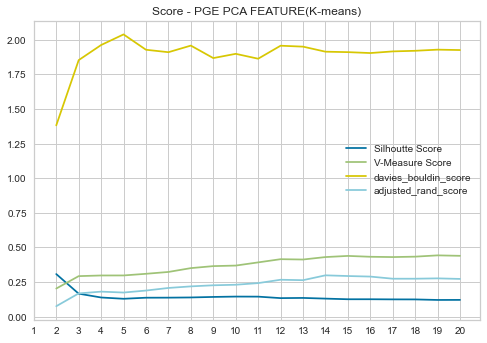

In [413]:
#using Silhoutte score and Vmeasure score for PGE PCA FEATURE dataset to find n_clusters
from sklearn.metrics import silhouette_score, v_measure_score, davies_bouldin_score, adjusted_rand_score
silhouette_score_1=[]
Vmeasure_score_1=[]
dbscore=[]
amis=[]
for i in range(2,21):
    kmeans_2=KMeans(n_clusters=i,init='k-means++',random_state=1234,max_iter=100)
    kmeans_2.fit(pge_pca_feature)
    predic_pgepca=kmeans_2.predict(pge_pca_feature)
    sscore = silhouette_score(pge_pca_feature, predic_pgepca, metric='euclidean')
    vscore = v_measure_score(labels, predic_pgepca)
    silhouette_score_1.append(sscore)
    Vmeasure_score_1.append(vscore)
    dbscore1 = davies_bouldin_score(pge_pca_feature, predic_pgepca)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, predic_pgepca)
    amis.append(amis1)

plt.plot(np.arange(2,21),silhouette_score_1,'bx-',label='Silhoutte Score')
plt.plot(np.arange(2,21),Vmeasure_score_1,'gx-',label='V-Measure Score')
plt.plot(np.arange(2,21),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,21),amis,'cx-',label='adjusted_rand_score')
plt.title("Score - PGE PCA FEATURE(K-means)")
plt.xticks(np.arange(1, 21, 1))
plt.legend()


#from the graph highest silhouette and least DB score can be seen for n=2 hence taking n as 2

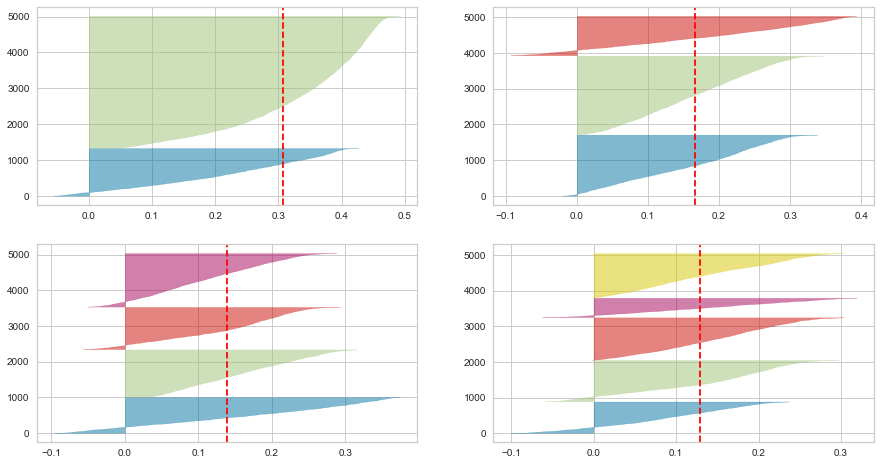

In [414]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3,4,5]:
    
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=1234)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pge_pca_feature)

In [415]:
#Taking n=2 based on elbow method, silhoutte score and silhoutte plot
kmeans_2=KMeans(n_clusters=2,init='k-means++',random_state=1234)
kmeans_2.fit(pge_pca_feature)
predic_2=kmeans_2.predict(pge_pca_feature)
unique=np.unique(predic_2)
kmeans_counts = np.unique(predic_2, return_counts = True)
print('Kmeans assignment counts')
pd.DataFrame({'Cluster Index': kmeans_counts[0], 'Number of members':kmeans_counts[1]}).set_index('Cluster Index')

Kmeans assignment counts


,Number of members
Cluster Index,
0,1327
1,3673


In [416]:
kmeans_silhouette = silhouette_score(pge_pca_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)

dbscore1_K = davies_bouldin_score(pge_pca_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)

ax1=pd.DataFrame({'Metrics PGE PCA': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,2]}).set_index('Metrics PGE PCA')
ax1

,Kmeans
Metrics PGE PCA,
Silhouette,0.307905
V-measure,0.203311
Davies Bouldin,1.381979
Adjusted Rand,0.075697
Clusters,2.000000


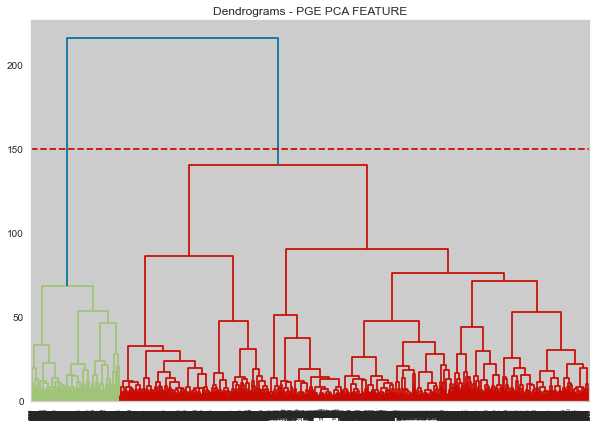

In [417]:
#Clustering for PGE PCA using Hierarchial Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms - PGE PCA FEATURE")  
dend = shc.dendrogram(shc.linkage(pge_pca_feature, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')


In [418]:
'''#PGE PCA Hierarchical hyper parameter tuning - uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean','l1','l2','manhattan','cosine']
linkagexx=['complete', 'average', 'single']
num1=[]
for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(pge_pca_feature)
            hs_silhouette = silhouette_score(pge_pca_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure,round((hs_silhouette+hs_vmeasure)*100,2)])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure','final']
df'''

"#PGE PCA Hierarchical hyper parameter tuning - uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean','l1','l2','manhattan','cosine']\nlinkagexx=['complete', 'average', 'single']\nnum1=[]\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(pge_pca_feature)\n            hs_silhouette = silhouette_score(pge_pca_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure,round((hs_silhouette+hs_vmeasure)*100,2)])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure','final']\ndf"

In [419]:
'''PGE PCA Hierarchical hyper parameter tuning including linkage=ward and fixing affinity=euclidean- uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean']
linkagexx=['ward','complete', 'average', 'single']
num1=[]
for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(pge_pca_feature)
            hs_silhouette = silhouette_score(pge_pca_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure']
df'''

"PGE PCA Hierarchical hyper parameter tuning including linkage=ward and fixing affinity=euclidean- uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean']\nlinkagexx=['ward','complete', 'average', 'single']\nnum1=[]\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(pge_pca_feature)\n            hs_silhouette = silhouette_score(pge_pca_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure']\ndf"

In [420]:
#Hyper parameter tuning
x=['ward','average','complete','single']
linkage_t=[]
linkage_v=[]
for i in x:
    cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=i)  
    agcl_test=cluster.fit_predict(pge_pca_feature)
    hs_silhouette = silhouette_score(pge_pca_feature, agcl_test)
    vscore_t = v_measure_score(labels, agcl_test)
    tuning = np.unique(hs_silhouette, return_counts = True)
    linkage_t.append(tuning)
    tuning2 = np.unique(vscore_t, return_counts = True)
    linkage_v.append(tuning2)
pd.DataFrame({'Linkage tuning': ['ward','average','complete','single'], 'Silhouette score': [linkage_t[0][0],linkage_t[1][0],linkage_t[2][0],linkage_t[3][0]],'V-Measure score': [linkage_v[0][0],linkage_v[1][0],linkage_v[2][0],linkage_v[3][0]]}).set_index('Linkage tuning')






,Silhouette score,V-Measure score
Linkage tuning,,
ward,[0.3199981],[0.11237852608290386]
average,[0.39838696],[0.0026724712658579785]
complete,[0.32203627],[0.1326895605531171]
single,[0.34450808],[0.0008069260396096387]


Text(0.5, 1.0, 'Score - PGE PCA FEATURE - PGE PCA FEATURE(Hierarchial Clustering)')

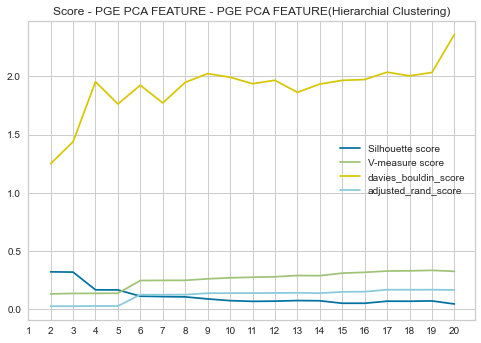

In [421]:
#Keeping tuned hyperparameters
sco=[]
vsco=[]
dbscore=[]
amis=[]
for i in range(2,21):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')  
    agcl=cluster.fit_predict(pge_pca_feature)
    vscore = v_measure_score(labels, agcl)
    sscore = silhouette_score(pge_pca_feature, agcl)
    sco.append(sscore)
    vscore = v_measure_score(labels, agcl)
    vsco.append(vscore)
    dbscore1 = davies_bouldin_score(pge_pca_feature, agcl)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, agcl)
    amis.append(amis1)
plt.plot(np.arange(2,21),sco,'bx-',label='Silhouette score')
plt.plot(np.arange(2,21),vsco,'gx-',label='V-measure score')
plt.plot(np.arange(2,21),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,21),amis,'cx-',label='adjusted_rand_score')
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.title("Score - PGE PCA FEATURE - PGE PCA FEATURE(Hierarchial Clustering)")   



In [422]:
#Taking k=2 from the dendograms and the silhoutte plot
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
agcl=cluster.fit_predict(pge_pca_feature)

unique=np.unique(agcl)
AgglomerativeClustering_counts = np.unique(agcl, return_counts = True)
print('AgglomerativeClustering assignment counts')
pd.DataFrame({'Cluster Index': AgglomerativeClustering_counts[0], 'Number of members':AgglomerativeClustering_counts[1]}).set_index('Cluster Index')


AgglomerativeClustering assignment counts


,Number of members
Cluster Index,
0,4295
1,705


In [423]:

hierarchial_silhouette = silhouette_score(pge_pca_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)

dbscore2_K = davies_bouldin_score(pge_pca_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)
ax2=pd.DataFrame({'Metrics PGE PCA': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'],'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,2]}).set_index('Metrics PGE PCA')
ax2

,Hierarchial
Metrics PGE PCA,
Silhouette,0.322036
V-measure,0.132690
Davies Bouldin,1.249669
Adjusted Rand,0.027408
Clusters,2.000000


In [424]:
kmeans_silhouette = silhouette_score(pge_pca_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)
hierarchial_silhouette = silhouette_score(pge_pca_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)
dbscore1_K = davies_bouldin_score(pge_pca_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)
dbscore2_K = davies_bouldin_score(pge_pca_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)
a=pd.DataFrame({'Metrics PGE PCA': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,2], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,2]}).set_index('Metrics PGE PCA')
a

,Kmeans,Hierarchial
Metrics PGE PCA,,
Silhouette,0.307905,0.322036
V-measure,0.203311,0.132690
Davies Bouldin,1.381979,1.249669
Adjusted Rand,0.075697,0.027408
Clusters,2.000000,2.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_1616\2907731423.py:33: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



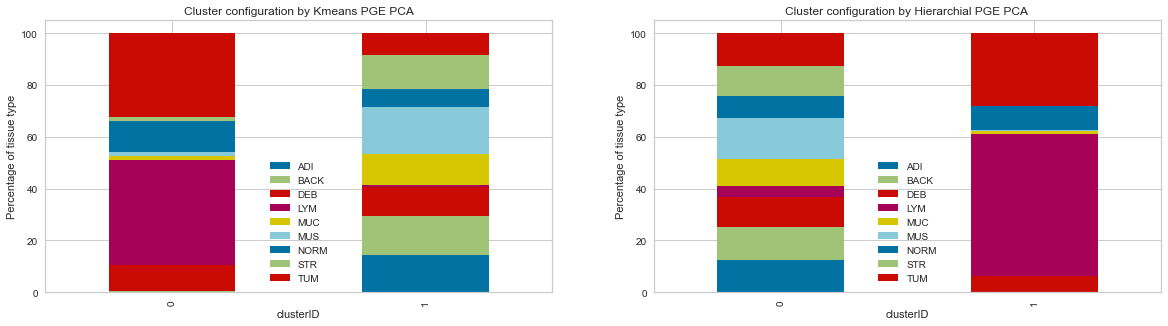

In [425]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

resulted_cluster_df = pd.DataFrame({'clusterID': predic_2, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='best')
axes[0].set_title('Cluster configuration by Kmeans PGE PCA')

resulted_cluster_df = pd.DataFrame({'clusterID': agcl, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='best')
axes[1].set_title('Cluster configuration by Hierarchial PGE PCA ')

f.show()

In [426]:
#UMAP PGE UMAP BY K-Means and Hierarchial Clustering

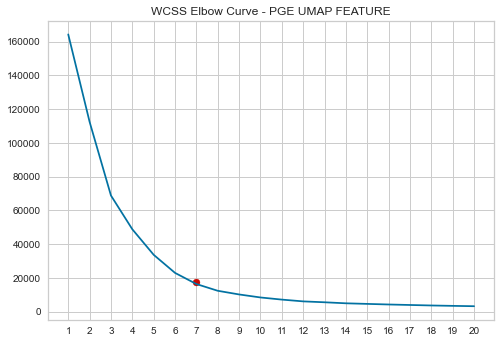

In [427]:
wcss=[]


for i in range(1,21):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(pge_umap_feature)
    wcss.append(kmeans.inertia_)

plt.plot(np.arange(1,21),wcss,'bx-')
wcss_n=np.array(wcss)
plt.title("WCSS Elbow Curve - PGE UMAP FEATURE")
plt.xticks(np.arange(1, 21, 1))
plt.scatter(7,17500, color='r')

#using elbow for PGE PCA FEATURE dataset to find n_clusters

In [428]:
'''#PGE Umap K-Means with algorithm=lloyd- uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
num1=[]
for i in clusters:
        for j in methodxx:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)
            kmeans_2.fit(pge_umap_feature)
            predic_2=kmeans_2.predict(pge_umap_feature)
            kmeans_silhouette = silhouette_score(pge_umap_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(pge_umap_feature, predic_2)
            #print(i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K)
            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df'''

"#PGE Umap K-Means with algorithm=lloyd- uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\nnum1=[]\nfor i in clusters:\n        for j in methodxx:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)\n            kmeans_2.fit(pge_umap_feature)\n            predic_2=kmeans_2.predict(pge_umap_feature)\n            kmeans_silhouette = silhouette_score(pge_umap_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(pge_umap_feature, predic_2)\n            #print(i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K)\n            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf"

In [429]:
'''#PGE Umap K-Means with algorithm=elkan/auto/full- uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
num1=[]
for i in clusters:
    for j in methodxx:
        for k in algorithm:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)
            kmeans_2.fit(pge_umap_feature)
            predic_2=kmeans_2.predict(pge_umap_feature)
            kmeans_silhouette = silhouette_score(pge_umap_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(pge_umap_feature, predic_2)
            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)
            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df'''

"#PGE Umap K-Means with algorithm=elkan/auto/full- uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\nnum1=[]\nfor i in clusters:\n    for j in methodxx:\n        for k in algorithm:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)\n            kmeans_2.fit(pge_umap_feature)\n            predic_2=kmeans_2.predict(pge_umap_feature)\n            kmeans_silhouette = silhouette_score(pge_umap_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(pge_umap_feature, predic_2)\n            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)\n            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf"

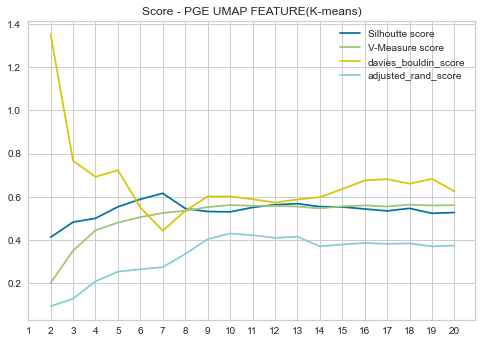

In [430]:
#using Silhoutte score/v-measure for PGE PCA FEATURE dataset to tune n_clusters
cum_sco=[]
vsco=[]
dbscore=[]
amis=[]
for i in range(2,21):
    kmeans_2=KMeans(n_clusters=i,init='k-means++',random_state=1234,max_iter=100)
    kmeans_2.fit(pge_umap_feature)
    predic_2=kmeans_2.predict(pge_umap_feature)
    score = silhouette_score(pge_umap_feature, predic_2, metric='euclidean')
    cum_sco.append(score)
    vscore = v_measure_score(labels, predic_2)
    vsco.append(vscore)
    dbscore1 = davies_bouldin_score(pge_umap_feature, predic_2)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, predic_2)
    amis.append(amis1)

plt.plot(np.arange(2,21),cum_sco,'bx-',label='Silhoutte score')
plt.plot(np.arange(2,21),vsco,'gx-',label='V-Measure score')
plt.plot(np.arange(2,21),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,21),amis,'cx-',label='adjusted_rand_score')
plt.title("Score - PGE UMAP FEATURE(K-means)")
plt.xticks(np.arange(1, 21, 1))
plt.legend()




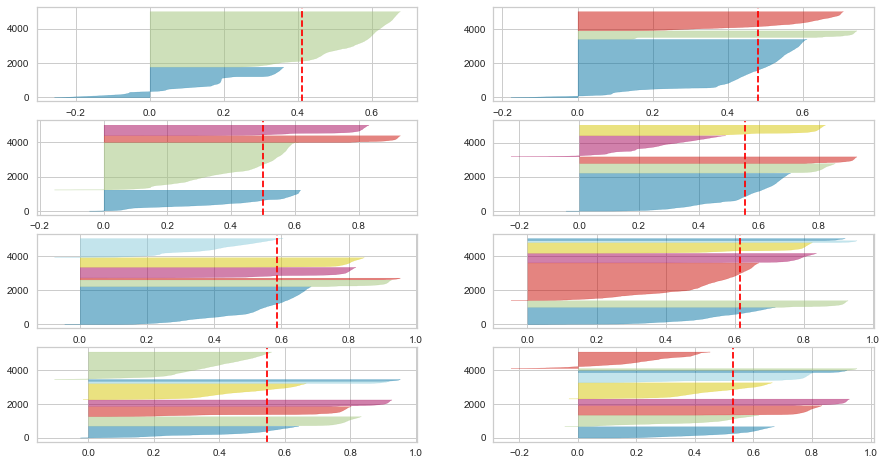

In [431]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3,4,5,6,7,8,9]:
    
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=1234)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pge_umap_feature)

In [432]:
#Taking n=7 based on elbow method, silhoutte score and silhoutte visualization
kmeans_2=KMeans(n_clusters=7,init='k-means++',random_state=1234)
kmeans_2.fit(pge_umap_feature)
predic_2=kmeans_2.predict(pge_umap_feature)
unique=np.unique(predic_2)
kmeans_counts = np.unique(predic_2, return_counts = True)
print('Kmeans assignment counts')
pd.DataFrame({'Cluster Index': kmeans_counts[0], 'Number of members':kmeans_counts[1]}).set_index('Cluster Index')

Kmeans assignment counts


,Number of members
Cluster Index,
0,1003
1,386
2,2218
3,551
4,617
5,104
6,121


In [433]:
kmeans_silhouette = silhouette_score(pge_umap_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)

dbscore1_K = davies_bouldin_score(pge_umap_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)

ax3=pd.DataFrame({'Metrics PGE UMAP': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,7]}).set_index('Metrics PGE UMAP')

ax3
#pd.DataFrame({'Metrics PGE UMAP': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,7], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,7]}).set_index('Metrics PGE UMAP')

,Kmeans
Metrics PGE UMAP,
Silhouette,0.615687
V-measure,0.524363
Davies Bouldin,0.441953
Adjusted Rand,0.273167
Clusters,7.000000


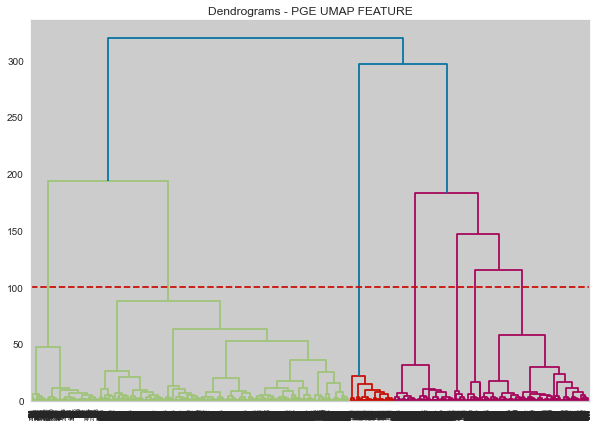

In [434]:
#Clustering for PGE UMAP using Hierarchial Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms - PGE UMAP FEATURE")  
dend = shc.dendrogram(shc.linkage(pge_umap_feature, method='ward'))
plt.axhline(y=100, color='r', linestyle='--')


In [435]:
'''#PGE Umap Hierarchical hyper parameter tuning without ward as linkage
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean','l1','l2','manhattan','cosine']
linkagexx=['complete', 'average', 'single']
num1=[]
for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(pge_umap_feature)
            hs_silhouette = silhouette_score(pge_umap_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure']
df'''

"#PGE Umap Hierarchical hyper parameter tuning without ward as linkage\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean','l1','l2','manhattan','cosine']\nlinkagexx=['complete', 'average', 'single']\nnum1=[]\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(pge_umap_feature)\n            hs_silhouette = silhouette_score(pge_umap_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure']\ndf"

In [436]:
'''#PGE Umap Hierarchical hyper parameter tuning without with ward as linkage
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean']
linkagexx=['ward','complete', 'average', 'single']
num1=[]

for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(pge_umap_feature)
            hs_silhouette = silhouette_score(pge_umap_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure']
df'''

"#PGE Umap Hierarchical hyper parameter tuning without with ward as linkage\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean']\nlinkagexx=['ward','complete', 'average', 'single']\nnum1=[]\n\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(pge_umap_feature)\n            hs_silhouette = silhouette_score(pge_umap_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure']\ndf"

In [437]:
#Hyper parameter tuning
x=['ward','average','complete','single']
linkage_t=[]
linkage_v=[]
for i in x:
    cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage=i)  
    agcl_test=cluster.fit_predict(pge_umap_feature)
    hs_silhouette = silhouette_score(pge_umap_feature, agcl_test)
    vscore_t = v_measure_score(labels, agcl_test)
    tuning = np.unique(hs_silhouette, return_counts = True)
    linkage_t.append(tuning)
    tuning2 = np.unique(vscore_t, return_counts = True)
    linkage_v.append(tuning2)
pd.DataFrame({'Linkage tuning': ['ward','average','complete','single'], 'Silhouette score': [linkage_t[0][0],linkage_t[1][0],linkage_t[2][0],linkage_t[3][0]],'V-Measure score': [linkage_v[0][0],linkage_v[1][0],linkage_v[2][0],linkage_v[3][0]]}).set_index('Linkage tuning')






,Silhouette score,V-Measure score
Linkage tuning,,
ward,[0.61504745],[0.525013901431699]
average,[0.52918994],[0.4026143383574228]
complete,[0.5360164],[0.41031434746656664]
single,[0.46775216],[0.23666370702061854]


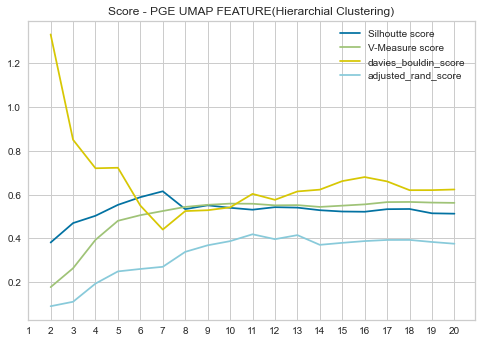

In [438]:
sco=[]
vsco=[]
dbscore=[]
amis=[]
for i in range(2,21):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    agcl=cluster.fit_predict(pge_umap_feature)
    vscore = v_measure_score(labels, agcl)
    sscore = silhouette_score(pge_umap_feature, agcl, metric='euclidean')
    sco.append(sscore)
    vscore = v_measure_score(labels, agcl)
    vsco.append(vscore)
    dbscore1 = davies_bouldin_score(pge_umap_feature, agcl)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, agcl)
    amis.append(amis1)
plt.plot(np.arange(2,21),sco,'bx-',label='Silhoutte score')
plt.plot(np.arange(2,21),vsco,'gx-',label='V-Measure score')
plt.plot(np.arange(2,21),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,21),amis,'cx-',label='adjusted_rand_score')
plt.title("Score - PGE UMAP FEATURE(Hierarchial Clustering)") 
plt.xticks(np.arange(1, 21, 1))
plt.legend()




In [439]:
#Taking k=7 as highest silhoutte score and dendogram seperation
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
agcl=cluster.fit_predict(pge_umap_feature)

unique=np.unique(agcl)
AgglomerativeClustering_counts = np.unique(agcl, return_counts = True)
print('AgglomerativeClustering assignment counts')
pd.DataFrame({'Cluster Index': AgglomerativeClustering_counts[0], 'Number of members':AgglomerativeClustering_counts[1]}).set_index('Cluster Index')


AgglomerativeClustering assignment counts


,Number of members
Cluster Index,
0,2249
1,976
2,386
3,613
4,551
5,104
6,121


In [440]:


hierarchial_silhouette = silhouette_score(pge_umap_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)

dbscore2_K = davies_bouldin_score(pge_umap_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)
ax4=pd.DataFrame({'Metrics PGE UMAP': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,7]}).set_index('Metrics PGE UMAP')
ax4

#pd.DataFrame({'Metrics PGE UMAP': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,7], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,7]}).set_index('Metrics PGE UMAP')

,Hierarchial
Metrics PGE UMAP,
Silhouette,0.615047
V-measure,0.525014
Davies Bouldin,0.440320
Adjusted Rand,0.270285
Clusters,7.000000


In [441]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
agcl=cluster.fit_predict(pge_umap_feature)
kmeans_silhouette = silhouette_score(pge_umap_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)
hierarchial_silhouette = silhouette_score(pge_umap_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)
dbscore1_K = davies_bouldin_score(pge_umap_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)
dbscore2_K = davies_bouldin_score(pge_umap_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)
b=pd.DataFrame({'Metrics PGE UMAP': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,7], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,7]}).set_index('Metrics PGE UMAP')

xo=pd.merge(a, b, left_index=True, right_index=True)
xo.columns=['Kmeans_PGE_PCA','Hierarchical_PGE_PCA','Kmeans_PGE_UMAP','Hierarchical_PGE_UMAP']
(xo)
#pd.DataFrame({'Metrics PGE UMAP': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,7], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,7]}).set_index('Metrics PGE UMAP')

,Kmeans_PGE_PCA,Hierarchical_PGE_PCA,Kmeans_PGE_UMAP,Hierarchical_PGE_UMAP
Silhouette,0.307905,0.322036,0.615687,0.615047
V-measure,0.203311,0.132690,0.524363,0.525014
Davies Bouldin,1.381979,1.249669,0.441953,0.440320
Adjusted Rand,0.075697,0.027408,0.273167,0.270285
Clusters,2.000000,2.000000,7.000000,7.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_1616\2639106910.py:33: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



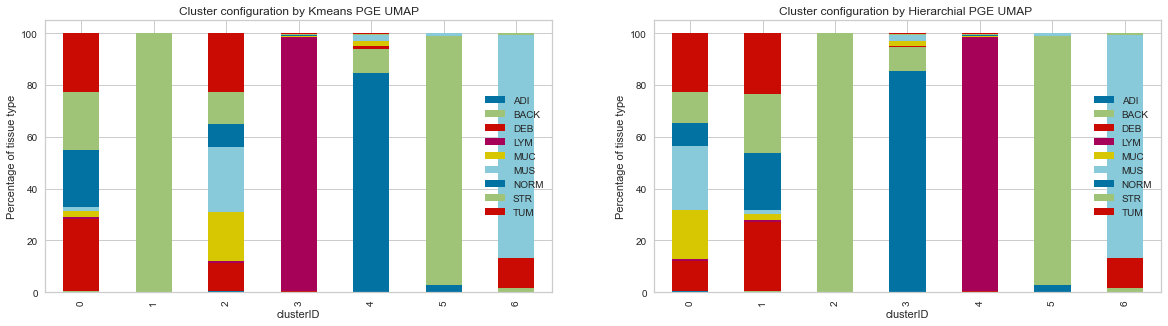

In [442]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

resulted_cluster_df = pd.DataFrame({'clusterID': predic_2, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='best')
axes[0].set_title('Cluster configuration by Kmeans PGE UMAP')

resulted_cluster_df = pd.DataFrame({'clusterID': agcl, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='best')
axes[1].set_title('Cluster configuration by Hierarchial PGE UMAP ')

f.show()

In [443]:
#Clustering of resnet50 pca

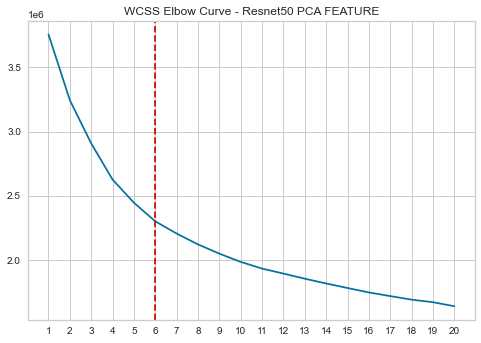

In [444]:
#Modeling for resnet50
wcss=[]


for i in range(1,21):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1234)
    kmeans.fit(resnet50_pca_feature)
    wcss.append(kmeans.inertia_)

plt.plot(np.arange(1,21),wcss,'bx-')
wcss_n=np.array(wcss)
plt.title("WCSS Elbow Curve - Resnet50 PCA FEATURE")
plt.xticks(np.arange(1, 21, 1))
plt.axvline(x=6, color='r', linestyle='--')

#using elbow for Resnet50 PCA FEATURE dataset to find n_clusters

In [445]:
'''#Resnet50 PCA K-Means hyperparameter tuning - uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
num1=[]
for i in clusters:
        for j in methodxx:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)
            kmeans_2.fit(resnet50_pca_feature)
            predic_2=kmeans_2.predict(resnet50_pca_feature)
            kmeans_silhouette = silhouette_score(resnet50_pca_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(resnet50_pca_feature, predic_2)
            #print(i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K)
            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df'''

"#Resnet50 PCA K-Means hyperparameter tuning - uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\nnum1=[]\nfor i in clusters:\n        for j in methodxx:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)\n            kmeans_2.fit(resnet50_pca_feature)\n            predic_2=kmeans_2.predict(resnet50_pca_feature)\n            kmeans_silhouette = silhouette_score(resnet50_pca_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(resnet50_pca_feature, predic_2)\n            #print(i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K)\n            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf"

In [446]:
''''#Resnet50 PCA K-Means hyperparameter tuning - uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
num1=[]
for i in clusters:
    for j in methodxx:
        for k in algorithm:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)
            kmeans_2.fit(resnet50_pca_feature)
            predic_2=kmeans_2.predict(resnet50_pca_feature)
            kmeans_silhouette = silhouette_score(resnet50_pca_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(resnet50_pca_feature, predic_2)
            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)
            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df'''

"'#Resnet50 PCA K-Means hyperparameter tuning - uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\nnum1=[]\nfor i in clusters:\n    for j in methodxx:\n        for k in algorithm:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)\n            kmeans_2.fit(resnet50_pca_feature)\n            predic_2=kmeans_2.predict(resnet50_pca_feature)\n            kmeans_silhouette = silhouette_score(resnet50_pca_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(resnet50_pca_feature, predic_2)\n            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)\n            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf"

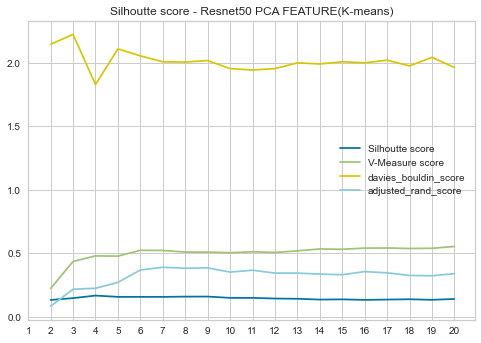

In [447]:
#using Silhoutte score for Resnet50 PCA FEATURE dataset to find n_clusters
cum_sco=[]
vsco=[]
dbscore=[]
amis=[]
for i in range(2,21):
    kmeans_2=KMeans(n_clusters=i,init='k-means++',random_state=1234,max_iter=100)
    kmeans_2.fit(resnet50_pca_feature)
    predic_2=kmeans_2.predict(resnet50_pca_feature)
    score = silhouette_score(resnet50_pca_feature, predic_2, metric='euclidean')
    cum_sco.append(score)
    vscore = v_measure_score(labels, predic_2)
    vsco.append(vscore)
    dbscore1 = davies_bouldin_score(resnet50_pca_feature, predic_2)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, predic_2)
    amis.append(amis1)

plt.plot(np.arange(2,21),cum_sco,'bx-',label='Silhoutte score')
plt.plot(np.arange(2,21),vsco,'gx-',label='V-Measure score')
plt.plot(np.arange(2,21),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,21),amis,'cx-',label='adjusted_rand_score')
plt.title("Silhoutte score - Resnet50 PCA FEATURE(K-means)")
plt.xticks(np.arange(1, 21, 1))
plt.legend()






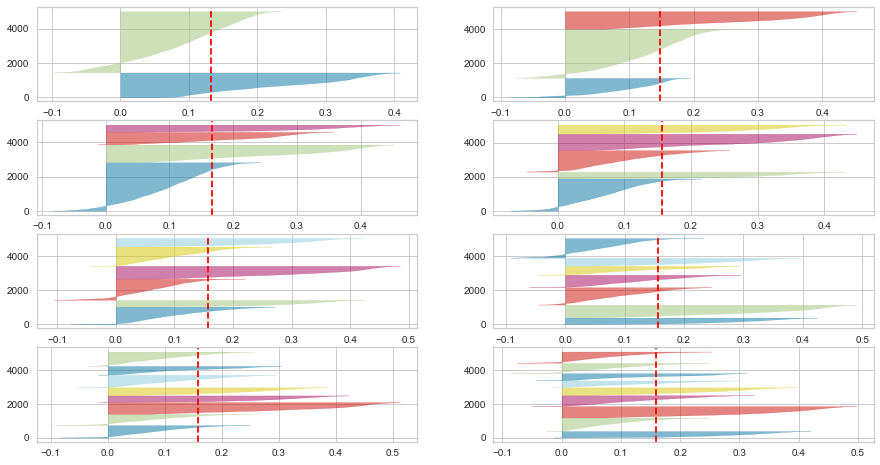

In [448]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3,4,5,6,7,8,9]:
    
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=1234)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(resnet50_pca_feature)

In [449]:
#Taking n=4 based on silhoutte score/DB score, however, elbow method shows 6
kmeans_2=KMeans(n_clusters=4,init='k-means++',random_state=1234)
kmeans_2.fit(resnet50_pca_feature)
predic_2=kmeans_2.predict(resnet50_pca_feature)
unique=np.unique(predic_2)
kmeans_counts = np.unique(predic_2, return_counts = True)
print('Kmeans assignment counts')
pd.DataFrame({'Cluster Index': kmeans_counts[0], 'Number of members':kmeans_counts[1]}).set_index('Cluster Index')

Kmeans assignment counts


,Number of members
Cluster Index,
0,2828
1,1028
2,729
3,415


In [450]:
kmeans_silhouette = silhouette_score(resnet50_pca_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)
dbscore1_K = davies_bouldin_score(resnet50_pca_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)

ax5=pd.DataFrame({'Metrics Resnet50 PCA': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,4]}).set_index('Metrics Resnet50 PCA')
ax5#pd.DataFrame({'Metrics Resnet50 PCA': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,4]}).set_index('Metrics Resnet50 PCA')

,Kmeans
Metrics Resnet50 PCA,
Silhouette,0.167112
V-measure,0.479300
Davies Bouldin,1.827544
Adjusted Rand,0.224435
Clusters,4.000000


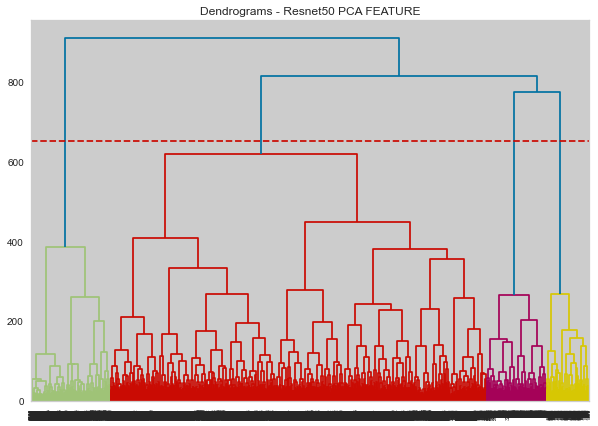

In [451]:
#Clustering for Resnet50 PCA using Hierarchial Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms - Resnet50 PCA FEATURE")  
dend = shc.dendrogram(shc.linkage(resnet50_pca_feature, method='ward'))
plt.axhline(y=650, color='r', linestyle='--')


In [452]:
'''#resnet50 PCA Hierarchical hyper parameter tuning - un comment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean','l1','l2','manhattan','cosine']
linkagexx=['complete', 'average', 'single']
num1=[]

for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(resnet50_pca_feature)
            hs_silhouette = silhouette_score(resnet50_pca_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure']
df'''

"#resnet50 PCA Hierarchical hyper parameter tuning - un comment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean','l1','l2','manhattan','cosine']\nlinkagexx=['complete', 'average', 'single']\nnum1=[]\n\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(resnet50_pca_feature)\n            hs_silhouette = silhouette_score(resnet50_pca_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure']\ndf"

In [453]:
'''#resnet50 PCA Hierarchical hyper parameter tuning, - uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean']
linkagexx=['ward','complete', 'average', 'single']
num1=[]

for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(resnet50_pca_feature)
            hs_silhouette = silhouette_score(resnet50_pca_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure']
df'''

"#resnet50 PCA Hierarchical hyper parameter tuning, - uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean']\nlinkagexx=['ward','complete', 'average', 'single']\nnum1=[]\n\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(resnet50_pca_feature)\n            hs_silhouette = silhouette_score(resnet50_pca_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure']\ndf"

In [454]:
#Hyper parameter tuning
x=['ward','average','complete','single']
linkage_t=[]
linkage_v=[]
for i in x:
    cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage=i)  
    agcl_test=cluster.fit_predict(resnet50_pca_feature)
    hs_silhouette = silhouette_score(resnet50_pca_feature, agcl_test)
    vscore_t = v_measure_score(labels, agcl_test)
    tuning = np.unique(hs_silhouette, return_counts = True)
    linkage_t.append(tuning)
    tuning2 = np.unique(vscore_t, return_counts = True)
    linkage_v.append(tuning2)
pd.DataFrame({'Linkage tuning': ['ward','average','complete','single'], 'Silhouette score': [linkage_t[0][0],linkage_t[1][0],linkage_t[2][0],linkage_t[3][0]],'V-Measure score': [linkage_v[0][0],linkage_v[1][0],linkage_v[2][0],linkage_v[3][0]]}).set_index('Linkage tuning')






,Silhouette score,V-Measure score
Linkage tuning,,
ward,[0.15156241],[0.5040995440199796]
average,[0.1295812],[0.16954574669083872]
complete,[0.12391267],[0.3782913511538437]
single,[0.07568839],[0.001156682079304754]


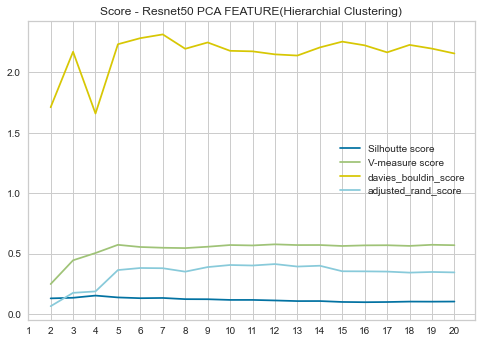

In [455]:
sco=[]
vsco=[]
dbscore=[]
amis=[]
for i in range(2,21):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    agcl=cluster.fit_predict(resnet50_pca_feature)
    vscore = v_measure_score(labels, agcl)
    sscore = silhouette_score(resnet50_pca_feature, agcl, metric='euclidean')
    sco.append(sscore)
    vscore = v_measure_score(labels, agcl)
    vsco.append(vscore)
    dbscore1 = davies_bouldin_score(resnet50_pca_feature, agcl)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, agcl)
    amis.append(amis1)
plt.plot(np.arange(2,21),sco,'bx-',label='Silhoutte score')
plt.plot(np.arange(2,21),vsco,'gx-',label='V-measure score')
plt.plot(np.arange(2,21),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,21),amis,'cx-',label='adjusted_rand_score')
plt.title("Score - Resnet50 PCA FEATURE(Hierarchial Clustering)")   
plt.xticks(np.arange(1, 21, 1))
plt.legend()



In [456]:
#Taking k=4 as highest silhoutte score and from the dendograms
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
agcl=cluster.fit_predict(resnet50_pca_feature)

unique=np.unique(agcl)
AgglomerativeClustering_counts = np.unique(agcl, return_counts = True)
print('AgglomerativeClustering assignment counts')
pd.DataFrame({'Cluster Index': AgglomerativeClustering_counts[0], 'Number of members':AgglomerativeClustering_counts[1]}).set_index('Cluster Index')


AgglomerativeClustering assignment counts


,Number of members
Cluster Index,
0,3370
1,715
2,381
3,534


In [457]:

hierarchial_silhouette = silhouette_score(resnet50_pca_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)

dbscore2_K = davies_bouldin_score(resnet50_pca_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)

ax6=pd.DataFrame({'Metrics Resnet50 PCA': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,4]}).set_index('Metrics Resnet50 PCA')
ax6
#pd.DataFrame({'Metrics Resnet50 PCA': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,4]}).set_index('Metrics Resnet50 PCA')

,Hierarchial
Metrics Resnet50 PCA,
Silhouette,0.151562
V-measure,0.504100
Davies Bouldin,1.659543
Adjusted Rand,0.186127
Clusters,4.000000


In [458]:
kmeans_silhouette = silhouette_score(resnet50_pca_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)
hierarchial_silhouette = silhouette_score(resnet50_pca_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)
dbscore1_K = davies_bouldin_score(resnet50_pca_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)
dbscore2_K = davies_bouldin_score(resnet50_pca_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)
c=pd.DataFrame({'Metrics Resnet50 PCA': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,4]}).set_index('Metrics Resnet50 PCA')
#pd.DataFrame({'Metrics Resnet50 PCA': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,4]}).set_index('Metrics Resnet50 PCA')

C:\Users\admin\AppData\Local\Temp\ipykernel_1616\439846362.py:33: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



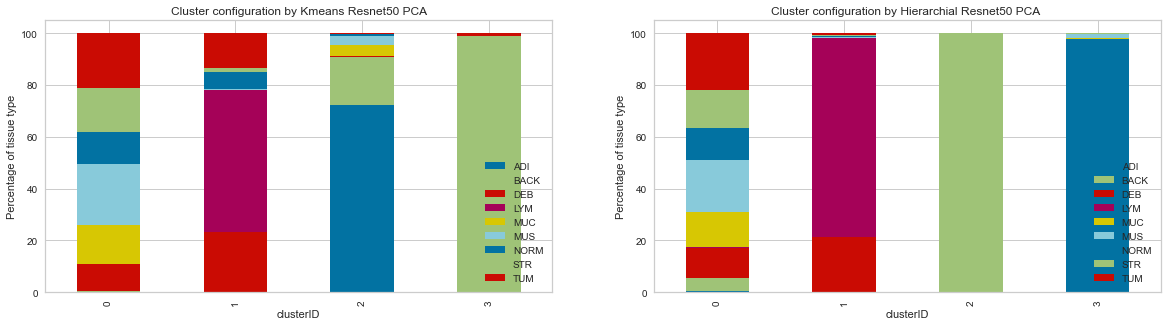

In [459]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

resulted_cluster_df = pd.DataFrame({'clusterID': predic_2, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='best')
axes[0].set_title('Cluster configuration by Kmeans Resnet50 PCA')

resulted_cluster_df = pd.DataFrame({'clusterID': agcl, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='best')
axes[1].set_title('Cluster configuration by Hierarchial Resnet50 PCA ')

f.show()

In [460]:
#Resnet50 UMAP clustering

([<matplotlib.axis.XTick at 0x23c77b30d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

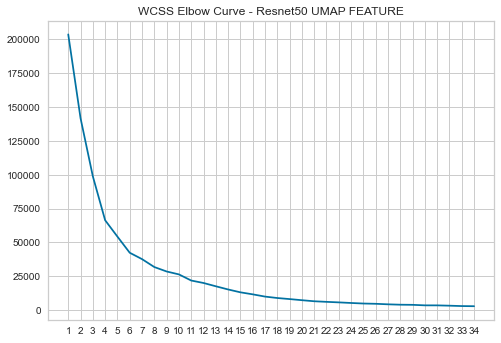

In [461]:
wcss=[]


for i in range(1,35):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1234)
    kmeans.fit(resnet50_umap_feature)
    wcss.append(kmeans.inertia_)

plt.plot(np.arange(1,35),wcss,'bx-')
wcss_n=np.array(wcss)
plt.title("WCSS Elbow Curve - Resnet50 UMAP FEATURE")
plt.xticks(np.arange(1, 35, 1))
#plt.axvline(x=6, color='r', linestyle='--')

#using elbow for PGE PCA FEATURE dataset to find n_clusters

In [462]:
'''#Resnet50 Umap K-Means hyperparameter tuning - uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
num1=[]
for i in clusters:
        for j in methodxx:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)
            kmeans_2.fit(resnet50_umap_feature)
            predic_2=kmeans_2.predict(resnet50_umap_feature)
            kmeans_silhouette = silhouette_score(resnet50_umap_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(resnet50_umap_feature, predic_2)
            #print(i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K)
            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df'''

"#Resnet50 Umap K-Means hyperparameter tuning - uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\nnum1=[]\nfor i in clusters:\n        for j in methodxx:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=0,n_init=30)\n            kmeans_2.fit(resnet50_umap_feature)\n            predic_2=kmeans_2.predict(resnet50_umap_feature)\n            kmeans_silhouette = silhouette_score(resnet50_umap_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(resnet50_umap_feature, predic_2)\n            #print(i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K)\n            num1.append([i,j,'lloyd',kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf"

In [463]:
'''#Resnet50 Umap K-Means hyperparameter tuning
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
methodxx=['k-means++','random']
algorithm=['elkan', 'auto', 'full']
num1=[]
for i in clusters:
    for j in methodxx:
        for k in algorithm:
            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)
            kmeans_2.fit(resnet50_umap_feature)
            predic_2=kmeans_2.predict(resnet50_umap_feature)
            kmeans_silhouette = silhouette_score(resnet50_umap_feature, predic_2)
            kmeans_v_measure = v_measure_score(labels, predic_2)
            dbscore1_K = davies_bouldin_score(resnet50_umap_feature, predic_2)
            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)
            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])
df=pd.DataFrame(num1)
df.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']
df'''

"#Resnet50 Umap K-Means hyperparameter tuning\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\nmethodxx=['k-means++','random']\nalgorithm=['elkan', 'auto', 'full']\nnum1=[]\nfor i in clusters:\n    for j in methodxx:\n        for k in algorithm:\n            kmeans_2=KMeans(n_clusters=i,init=j,random_state=1234,algorithm=k)\n            kmeans_2.fit(resnet50_umap_feature)\n            predic_2=kmeans_2.predict(resnet50_umap_feature)\n            kmeans_silhouette = silhouette_score(resnet50_umap_feature, predic_2)\n            kmeans_v_measure = v_measure_score(labels, predic_2)\n            dbscore1_K = davies_bouldin_score(resnet50_umap_feature, predic_2)\n            #print(i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K)\n            num1.append([i,j,k,kmeans_silhouette,kmeans_v_measure,dbscore1_K])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','method','algorithm','Silhouette','V-Measure','DB Score']\ndf"

Text(0.5, 1.0, 'Score - ResNet50 UMAP FEATURE(K-means)')

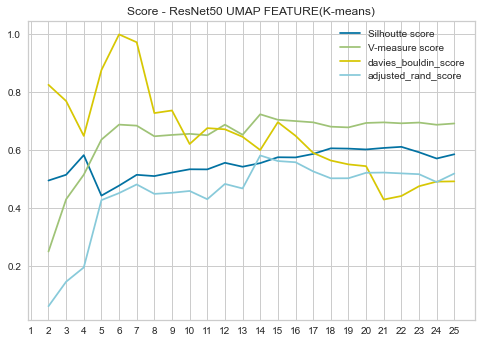

In [464]:
cum_sco=[]
vsco=[]
dbscore=[]
amis=[]
for i in range(2,26):
    kmeans_2=KMeans(n_clusters=i,init='k-means++',random_state=5,max_iter=10)
    kmeans_2.fit(resnet50_umap_feature)
    predic_2=kmeans_2.predict(resnet50_umap_feature)
    score = silhouette_score(resnet50_umap_feature, predic_2, metric='euclidean')
    cum_sco.append(score)
    vscore = v_measure_score(labels, predic_2)
    vsco.append(vscore)
    dbscore1 = davies_bouldin_score(resnet50_umap_feature, predic_2)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, predic_2)
    amis.append(amis1)

plt.plot(np.arange(2,26),cum_sco,'bx-',label="Silhoutte score")
plt.plot(np.arange(2,26),vsco,'gx-',label="V-measure score")
plt.plot(np.arange(2,26),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,26),amis,'cx-',label='adjusted_rand_score')
plt.xticks(np.arange(1, 26, 1))
plt.legend()
plt.title("Score - ResNet50 UMAP FEATURE(K-means)")


#using Silhoutte score for PGE PCA FEATURE dataset to find n_clusters




In [465]:
#Taking n=22 based as we get the highest silhouette score at it
kmeans_2=KMeans(n_clusters=22,init='k-means++',random_state=5)
kmeans_2.fit(resnet50_umap_feature)
predic_2=kmeans_2.predict(resnet50_umap_feature)
unique=np.unique(predic_2)
kmeans_counts = np.unique(predic_2, return_counts = True)
print('Kmeans assignment counts')
pd.DataFrame({'Cluster Index': kmeans_counts[0], 'Number of members':kmeans_counts[1]}).set_index('Cluster Index')

Kmeans assignment counts


,Number of members
Cluster Index,
0,270
1,361
2,530
3,210
4,328
5,120
6,60
7,57
8,34


In [466]:
kmeans_silhouette = silhouette_score(resnet50_umap_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)

dbscore1_K = davies_bouldin_score(resnet50_umap_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)

ax7=pd.DataFrame({'Metrics UMAP Restnet50': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,22]}).set_index('Metrics UMAP Restnet50')
ax7
#pd.DataFrame({'Metrics UMAP Restnet50': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,5]}).set_index('Metrics UMAP Restnet50')

,Kmeans
Metrics UMAP Restnet50,
Silhouette,0.611376
V-measure,0.692613
Davies Bouldin,0.441698
Adjusted Rand,0.519757
Clusters,22.000000


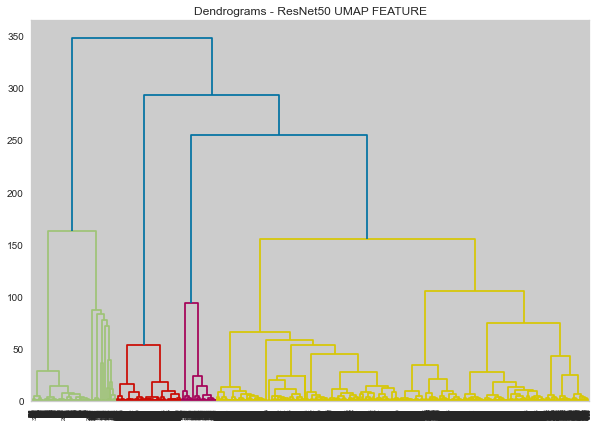

In [467]:
#Clustering for PGE UMAP using Hierarchial Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms - ResNet50 UMAP FEATURE")  
dend = shc.dendrogram(shc.linkage(resnet50_umap_feature, method='ward'))
#plt.axhline(y=180, color='r', linestyle='--')


In [468]:
'''#resnet50 Umap Hierarchical hyper parameter tuning uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean','l1','l2','manhattan','cosine']
linkagexx=['complete', 'average', 'single']
num1=[]

for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(resnet50_umap_feature)
            hs_silhouette = silhouette_score(resnet50_umap_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure']
df'''

"#resnet50 Umap Hierarchical hyper parameter tuning uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean','l1','l2','manhattan','cosine']\nlinkagexx=['complete', 'average', 'single']\nnum1=[]\n\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(resnet50_umap_feature)\n            hs_silhouette = silhouette_score(resnet50_umap_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure']\ndf"

In [469]:
'''#resnet50 Umap Hierarchical hyper parameter tuning uncomment to run
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
affinityxx=['euclidean']
linkagexx=['ward','complete', 'average', 'single']
num1=[]

for i in clusters:
    for j in affinityxx:
        for k in linkagexx:
            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  
            agcl_test=cluster.fit_predict(resnet50_umap_feature)
            hs_silhouette = silhouette_score(resnet50_umap_feature, agcl_test)
            hs_vmeasure = v_measure_score(labels, agcl_test)
            #print(i,j,k,hs_silhouette,hs_vmeasure)
            num1.append([i,j,k,hs_silhouette,hs_vmeasure])
df=pd.DataFrame(num1)
df.columns=['clusters','affinity','linkage','Silhouette','V-Measure']
df'''

"#resnet50 Umap Hierarchical hyper parameter tuning uncomment to run\nclusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]\naffinityxx=['euclidean']\nlinkagexx=['ward','complete', 'average', 'single']\nnum1=[]\n\nfor i in clusters:\n    for j in affinityxx:\n        for k in linkagexx:\n            cluster = AgglomerativeClustering(n_clusters=i, affinity=j, linkage=k)  \n            agcl_test=cluster.fit_predict(resnet50_umap_feature)\n            hs_silhouette = silhouette_score(resnet50_umap_feature, agcl_test)\n            hs_vmeasure = v_measure_score(labels, agcl_test)\n            #print(i,j,k,hs_silhouette,hs_vmeasure)\n            num1.append([i,j,k,hs_silhouette,hs_vmeasure])\ndf=pd.DataFrame(num1)\ndf.columns=['clusters','affinity','linkage','Silhouette','V-Measure']\ndf"

In [470]:
#Hyper parameter tuning
x=['ward','average','complete','single']
linkage_t=[]
linkage_v=[]
for i in x:
    cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage=i)  
    agcl_test=cluster.fit_predict(resnet50_umap_feature)
    hs_silhouette = silhouette_score(resnet50_umap_feature, agcl_test)
    vscore_t = v_measure_score(labels, agcl_test)
    tuning = np.unique(hs_silhouette, return_counts = True)
    linkage_t.append(tuning)
    tuning2 = np.unique(vscore_t, return_counts = True)
    linkage_v.append(tuning2)
pd.DataFrame({'Linkage tuning': ['ward','average','complete','single'], 'Silhouette score': [linkage_t[0][0],linkage_t[1][0],linkage_t[2][0],linkage_t[3][0]],'V-Measure score': [linkage_v[0][0],linkage_v[1][0],linkage_v[2][0],linkage_v[3][0]]}).set_index('Linkage tuning')






,Silhouette score,V-Measure score
Linkage tuning,,
ward,[0.60360485],[0.6806548602916138]
average,[0.51870614],[0.5779945089494091]
complete,[0.5604479],[0.6621585514866802]
single,[0.6662179],[0.5680131180078674]


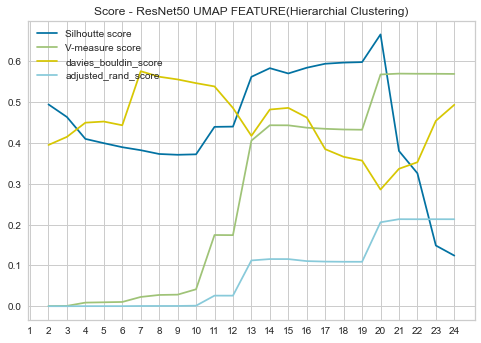

In [471]:
sco=[]
vsco=[]
dbscore=[]
amis=[]
for i in range(2,25):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')  
    agcl=cluster.fit_predict(resnet50_umap_feature)
    #vscore = v_measure_score(labels, agcl)
    sscore = silhouette_score(resnet50_umap_feature, agcl, metric='euclidean')
    sco.append(sscore)
    vscore = v_measure_score(labels, agcl)
    vsco.append(vscore)
    dbscore1 = davies_bouldin_score(resnet50_umap_feature, agcl)
    dbscore.append(dbscore1)
    amis1 = adjusted_rand_score(labels, agcl)
    amis.append(amis1)
plt.plot(np.arange(2,25),sco,'bx-',label="Silhoutte score")
plt.plot(np.arange(2,25),vsco,'gx-',label="V-measure score")
plt.plot(np.arange(2,25),dbscore,'yx-',label='davies_bouldin_score')
plt.plot(np.arange(2,25),amis,'cx-',label='adjusted_rand_score')
plt.title("Score - ResNet50 UMAP FEATURE(Hierarchial Clustering)") 
plt.xticks(np.arange(1, 25, 1))
plt.legend()




In [472]:
#Taking k=20
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='single')  
agcl=cluster.fit_predict(resnet50_umap_feature)

unique=np.unique(agcl)
AgglomerativeClustering_counts = np.unique(agcl, return_counts = True)
print('AgglomerativeClustering assignment counts')
pd.DataFrame({'Cluster Index': AgglomerativeClustering_counts[0], 'Number of members':AgglomerativeClustering_counts[1]}).set_index('Cluster Index')


AgglomerativeClustering assignment counts


,Number of members
Cluster Index,
0,3320
1,581
2,530
3,21
4,105
5,208
6,13
7,20
8,55


In [473]:

hierarchial_silhouette = silhouette_score(resnet50_umap_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)

dbscore2_K = davies_bouldin_score(resnet50_umap_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)
ax8=pd.DataFrame({'Metrics UMAP Restnet50': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,20]}).set_index('Metrics UMAP Restnet50')
ax8
#pd.DataFrame({'Metrics UMAP Restnet50': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,5]}).set_index('Metrics UMAP Restnet50')

,Hierarchial
Metrics UMAP Restnet50,
Silhouette,0.666218
V-measure,0.568013
Davies Bouldin,0.285907
Adjusted Rand,0.205708
Clusters,20.000000


In [474]:
kmeans_silhouette = silhouette_score(resnet50_umap_feature, predic_2)
kmeans_v_measure = v_measure_score(labels, predic_2)
hierarchial_silhouette = silhouette_score(resnet50_umap_feature, agcl)
hierarchial_v_measure = v_measure_score(labels, agcl)
dbscore1_K = davies_bouldin_score(resnet50_umap_feature, predic_2)
amis1_K = adjusted_rand_score(labels, predic_2)
dbscore2_K = davies_bouldin_score(resnet50_umap_feature, agcl)
amis2_K = adjusted_rand_score(labels, agcl)
d=pd.DataFrame({'Metrics UMAP Restnet50': ['Silhouette', 'V-measure','Davies Bouldin','Adjusted Rand','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,dbscore1_K,amis1_K,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,dbscore2_K,amis2_K,4]}).set_index('Metrics UMAP Restnet50')
#pd.DataFrame({'Metrics UMAP Restnet50': ['silhouette', 'V-measure','Clusters'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure,4], 'Hierarchial': [hierarchial_silhouette, hierarchial_v_measure,5]}).set_index('Metrics UMAP Restnet50')

C:\Users\admin\AppData\Local\Temp\ipykernel_1616\1796294552.py:33: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



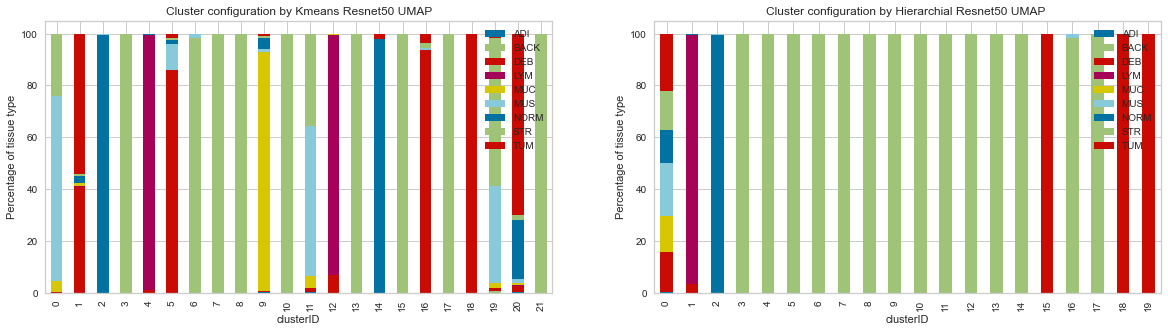

In [475]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

resulted_cluster_df = pd.DataFrame({'clusterID': predic_2, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='best')
axes[0].set_title('Cluster configuration by Kmeans Resnet50 UMAP')

resulted_cluster_df = pd.DataFrame({'clusterID': agcl, 'type': labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='best')
axes[1].set_title('Cluster configuration by Hierarchial Resnet50 UMAP ')

f.show()

In [476]:
y=pd.concat([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8],axis=1)
y.columns=(['Kmeans PGE PCA','Hierarchical PGE PCA','Kmeans PGE UMAP','Hierarchical PGE UMAP','Kmeans ResNet50 PCA','Hierarchical ResNet50 PCA','Kmeans ResNet50 UMAP','Hierarchical ResNet50 UMAP'])
y

,Kmeans PGE PCA,Hierarchical PGE PCA,Kmeans PGE UMAP,Hierarchical PGE UMAP,Kmeans ResNet50 PCA,Hierarchical ResNet50 PCA,Kmeans ResNet50 UMAP,Hierarchical ResNet50 UMAP
Silhouette,0.307905,0.322036,0.615687,0.615047,0.167112,0.151562,0.611376,0.666218
V-measure,0.203311,0.132690,0.524363,0.525014,0.479300,0.504100,0.692613,0.568013
Davies Bouldin,1.381979,1.249669,0.441953,0.440320,1.827544,1.659543,0.441698,0.285907
Adjusted Rand,0.075697,0.027408,0.273167,0.270285,0.224435,0.186127,0.519757,0.205708
Clusters,2.000000,2.000000,7.000000,7.000000,4.000000,4.000000,22.000000,20.000000
